In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from aind_analysis_arch_result_access.han_pipeline import get_session_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = get_session_table()

In [42]:
def plot_session_counts_over_time(
    df,
    time_bin="D",
    bar_width=0.8,
    group_by="curriculum_name",
    group_rename=None,
    group_custom_order=None,
    group_custom_color=None,
    ax=None,
):
    # Count number of sessions per day per type
    session_counts = (
        df.groupby([pd.Grouper(key="session_date", freq=time_bin), group_by])
        .size()
        .unstack(fill_value=0)
    )
    if group_rename is not None:
        session_counts = session_counts.rename(columns=group_rename)
    if group_custom_order is not None:
        session_counts = session_counts[group_custom_order]

    # Plot stacked bar chart
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    session_counts.plot(
        kind="bar",
        stacked=True,
        ax=ax,
        width=bar_width,
        **({} if group_custom_color is None else {"color": group_custom_color}),
    )
    ax.set_xlabel("Date")
    ax.set_ylabel("Number of sessions")
    ax.legend(title=group_by)

    # Format x-axis to show only year and month
    ax.set_xticks([])  # Hide all default x-ticks
    ax.set_xticks(
        range(len(session_counts),0, -max(1, len(session_counts) // 10))
    )  # Set sparse ticks
    ax.set_xticklabels(
        session_counts.index[:: -max(1, len(session_counts) // 10)].strftime("%Y-%m"),
        rotation=45,
    )
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Rotate x axix ticks
    ax.tick_params(axis="x", rotation=45)
    return ax

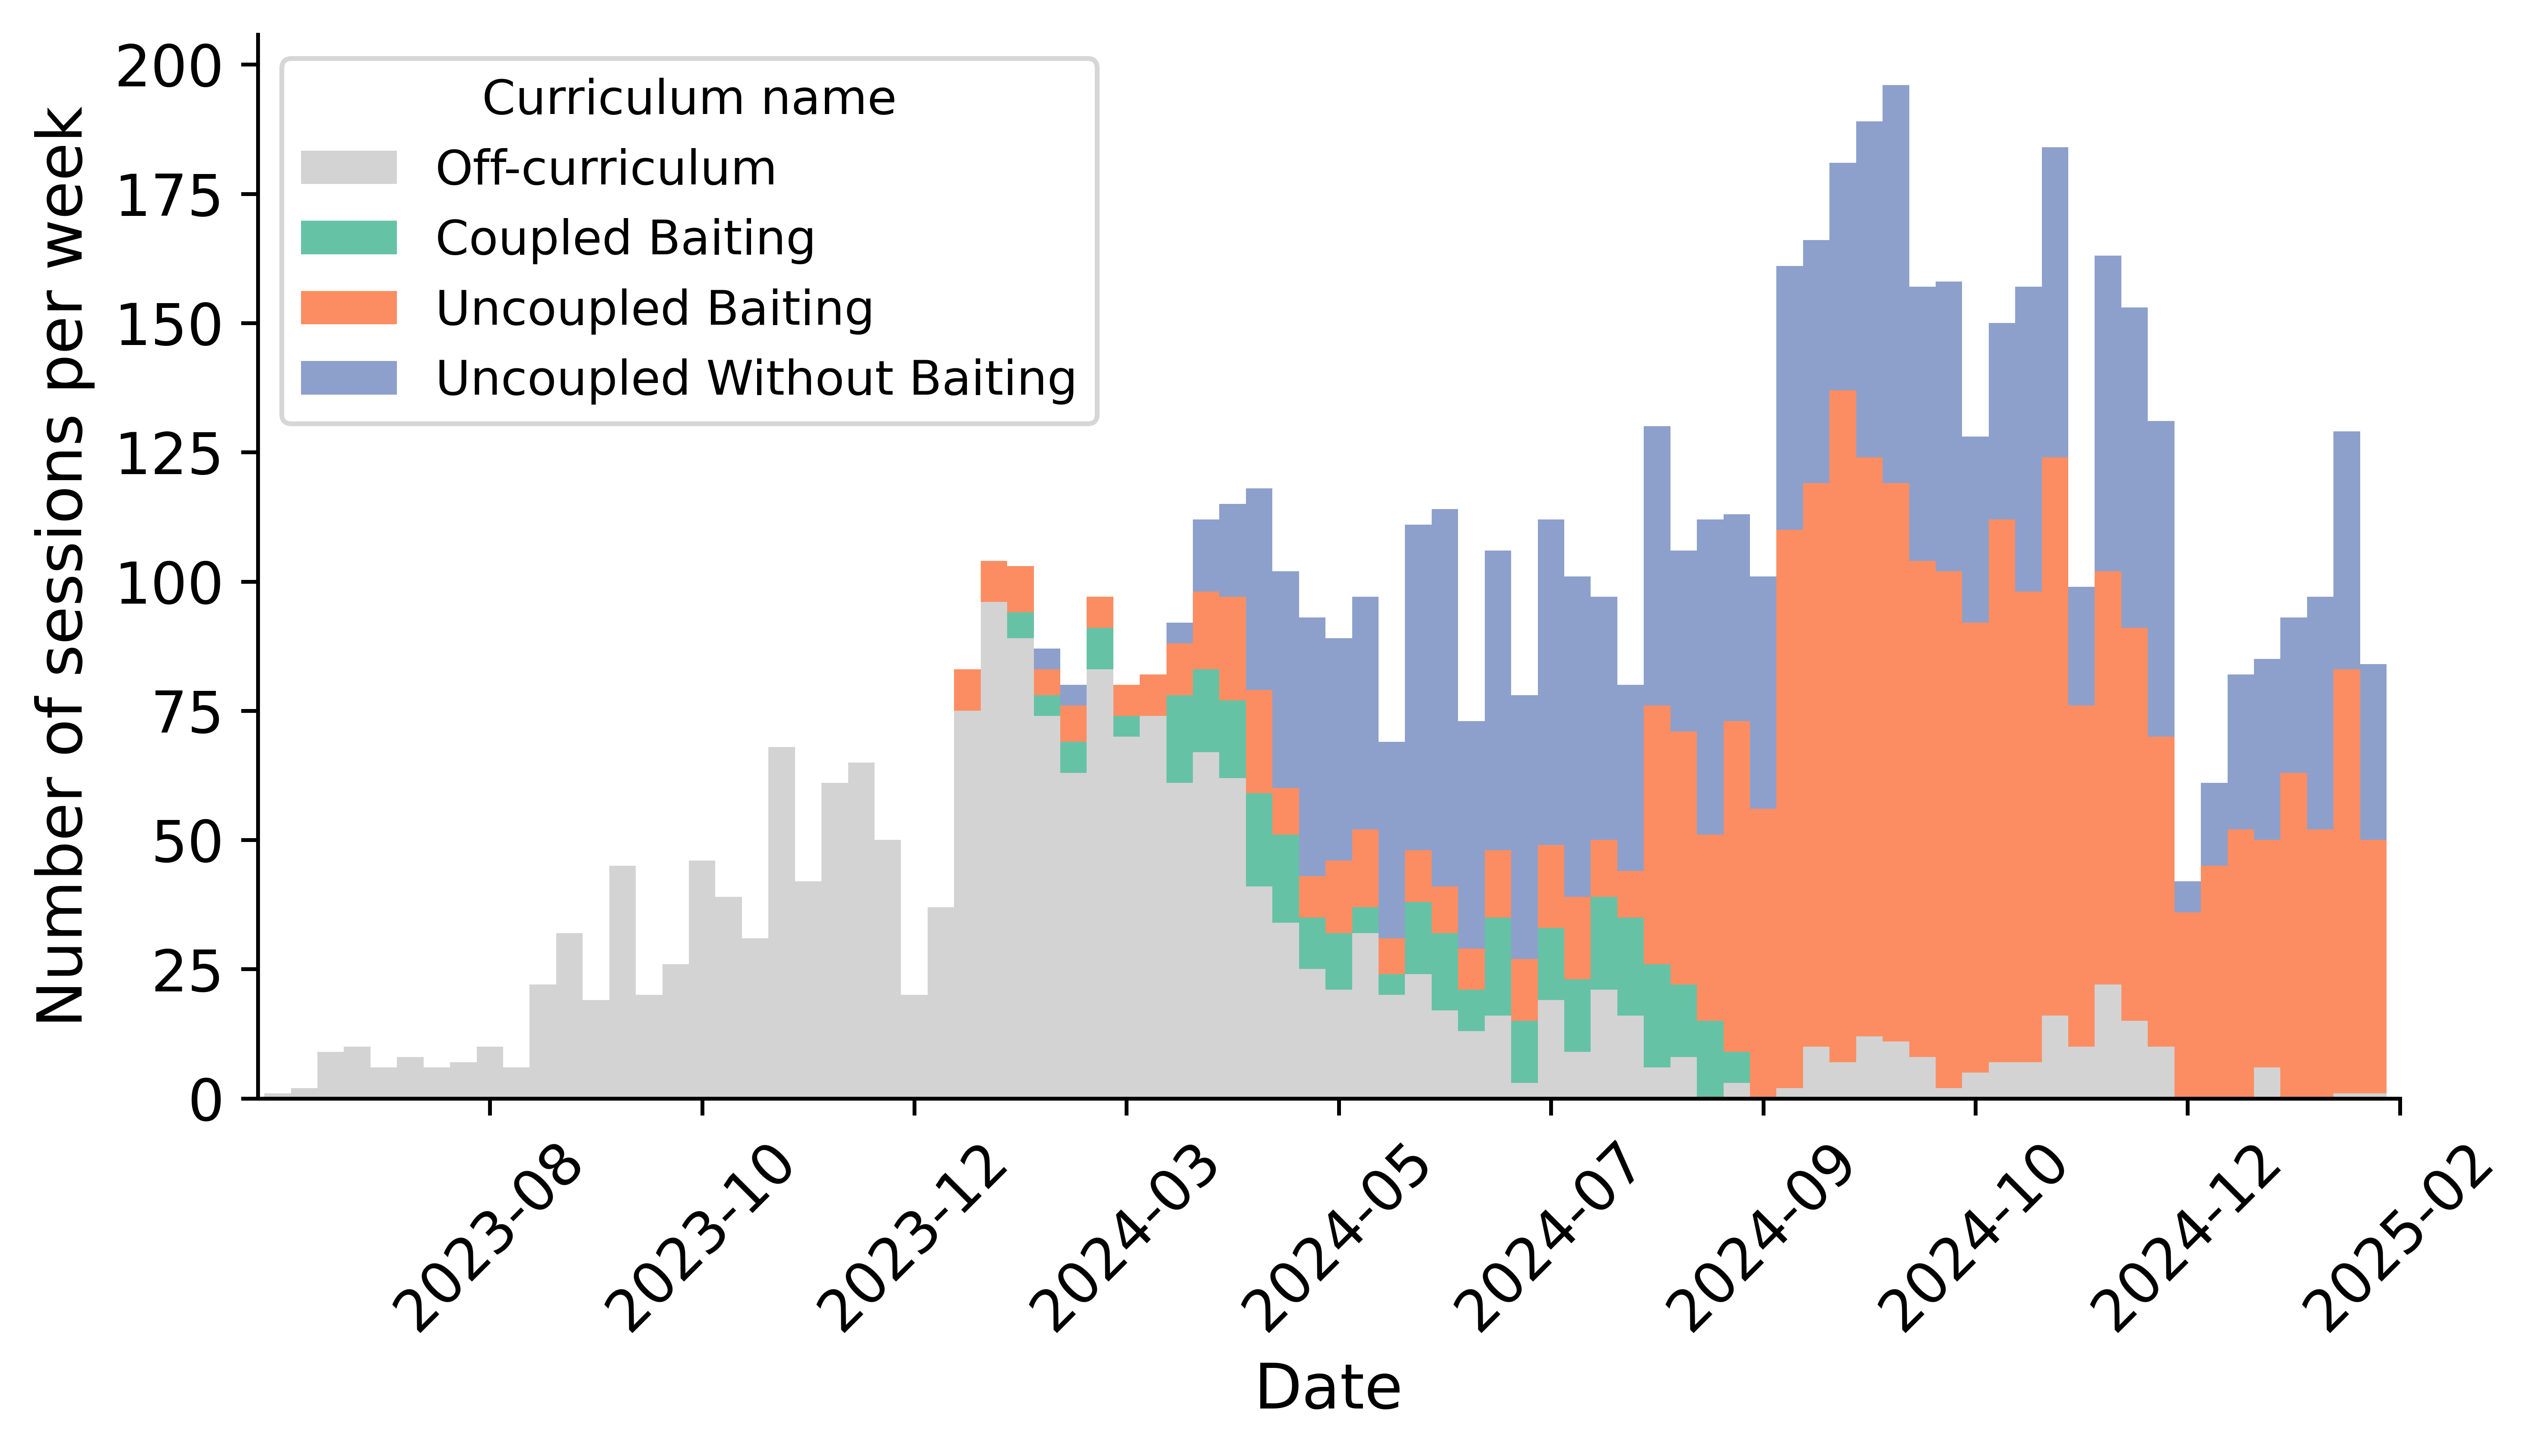

In [44]:
import matplotlib
import matplotlib.colors as mcolors
plt.rcParams.update({'font.size': 12})

# Get colors from the "Set2" colormap
colormap = matplotlib.colormaps["Set2"]

# Display the plot
fig, ax = plt.subplots(figsize=(8, 4), dpi=800)
ax = plot_session_counts_over_time(
    df,
    time_bin="W",
    bar_width=1,
    group_rename={
        "Coupled Baiting": "Coupled Baiting",
        "Uncoupled Baiting": "Uncoupled Baiting",
        "Uncoupled Without Baiting": "Uncoupled Without Baiting",
        "None": "Off-curriculum",
    },
    group_custom_order=["Off-curriculum", "Coupled Baiting", "Uncoupled Baiting", "Uncoupled Without Baiting"],
    group_custom_color=["lightgray"] + [colormap(i) for i in range(3)],
    ax=ax,
)

# set axis title font size
ax.set_xlabel("Date", fontsize=13)
ax.set_ylabel("Number of sessions per week", fontsize=13)

# set legend title font size
ax.legend(title="Curriculum name", title_fontsize=10, fontsize=10)

# save svg
fig.savefig("session_counts_by_curriculum_name_over_time.svg", bbox_inches="tight")


In [6]:
    color_mapping = {
        "Coupled Baiting": "darkred",
        "Uncoupled Baiting": "darkgreen",
        "Uncoupled Without Baiting": "darkblue",
        "None": "gray",
    }
    list(color_mapping.keys())

['Coupled Baiting', 'Uncoupled Baiting', 'Uncoupled Without Baiting', 'None']